# 8. Time Series Analysis

The analysis of time-series is an area of great interest in data science, given the ubiquity of time-series data in the real world. Beyond extracting insights using statistical methods, the ability to forecast future events given historical data has widespread applications from stock prices to weather prediction. Here, we cover the basics of the ARIMA method, or AutoRegressive Integrated Moving Average, which is one of the most effective and common ways to build a model of time-series data.

## 8.1 Box-Jenkins Methodology

Time-series analysis is the study of data consisting of variables measured at different time-intervals. The focus is generally to uncover the structure of the data in order to forecast the series into the future. This can be used to, for instance, predict retail sales, anticipate population migration patterns and forecast stock prices.

A time-series can consist of three components, which combine to produce the overall structure:

- Trend: refers to the long-term movement of the time-series, generally monotonic.
- Seasonality: a fixed periodic pattern, often directly related to the calendar or the time of day.
- Cyclic: a periodic fluctuation without a fixed time-span, such as the boom-bust cycles of the economy.
- Random: the random component is what's leftover after accounting for all other components. Although noise is always present, there is often some structure to the random component that can be modeled to forecast future values.

The Box-Jenkins methodology for time series analysis, developed by George Box and Gwilym Jenkins, is a three step process for building time-series models:

1. Condition data and select a model.
    - Identify and account for any trends or seasonality in the time series.
    - Examine the remaining time series and determine a suitable model.
2. Estimate the model parameters.
3. Assess the model and, if necessary, return to Step 1.

The first step in the process is essential for obtaining a model with certain properties to which autoregressive and moving average models can be applied. Such a time series is known as a stationary time series. A time series, $y_t$ for $t=1,2,3,...$ is a stationary time series if the following three conditions are met:

- (a) The expected value $\mu_t$ (mean) of $y_t$ is a constant for all values of $t$.
- (b) The variance of $y_t$ is finite.
- (c) The covariance of $y_t$ and $y_{t+h}$ depends only on the value of $h=0,1,2,...$ for all t.

The covariance of $y_t$ and $y_{t + h}$ is a measure of how the two variables, $y_t$ and $y_{t + h}$, vary together. It is expressed as:

$$cov(y_t,y_{t+h})=cov(h)=E[(y_t −μ_t)(y_{t+h}−μ_{t+h})]$$

The variable $h$ is referred to as the *lag*. Two completely independent variables have a covariance of 0.

## 8.2 ARIMA Model

### 8.2.1 AR Models

The autocorrelation function $ACF(h) = \frac{cov(h)}{cov(0)}$ gives a measure of the correlation between $y_t$ and $y_{t-h}$. An autoregressive model AR(p) of $y_t$ can be expressed as:

$$ y_t=\delta+\phi_1 y_{t-1} +\phi_2 y_{t-2} +...+\phi_p y_{t-p} +\epsilon $$

$\delta$ is a constant for a non-zero centred time-series,
$\phi$ are constants representing the autocorrelation at different lags and
$\epsilon$ is an error term.

One problem with this method is that even in the simple AR(1) model, there will be considerable autocorrelation with the larger lags even though those lags are not explicitly included in the model. What is needed is a measure of the autocorrelation between $y_t$ and $y_{t + h}$ for $h = 1, 2, 3...$ with the effect of the $y_{t +1}$ to $y_{t + h−1}$ values excluded from the measure. The partial autocorrelation function (PACF) provides such a measure:

$$ PACF(h\geq2) = corr(y_t − y_t^*,y_{h+t} −y_{h+t}^* ) $$

$$ PACF(h=1) = corr(y_t,y_{h+t}) $$

Where:

$$ y_t^* = \beta_1 y_{t+1} + \beta_2 y_{t+2} ... \beta_{h-1} y_{t+h-1}$$

$$ y_{t+h}^* = \beta_1 y_{t+h-1} + \beta_2 y_{t+h-2} ... \beta_{h-1} y_{t+1}$$

the $h−1$ values of the $\beta$ coefficients are based on linear regression.

In other words, after linear regression is used to remove the effect of the variables between $y_t$ and $y_{t+h}$ on $y_t$ and $y_{t+h}$, the PACF is the correlation of what remains. For $h=1$, there are no variables between $y_t$ and $y_{t +1}$. So the PACF(1) equals ACF(1). Although the computation of the PACF is somewhat complex, many software tools hide this complexity from the analyst.

### 8.2.2 MA Models

For a time series, $y_t$, centered at zero, a moving average model of order q, denoted MA(q), is expressed as shown:

$$ y_t = \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} ... \theta_q \epsilon_{t-q} $$

$\theta$ are the parameters of the model, and $\epsilon$ are white noise error terms.

In an MA(q) model, the value of a time series is a linear combination of the current white noise term and the prior q white noise terms. So earlier random shocks directly affect the current value of the time series.

### 8.2.3 ARMA and ARIMA Models

In general, the data scientist does not have to choose between an AR(p) and an MA(q) model to describe a time series. In fact, it is often useful to combine these two representations into one model. The combination of these two models for a stationary time series results in an Autoregressive Moving Average model, ARMA(p,q), which is expressed as shown:

$$ y_t=\delta+\phi_1 y_{t-1} +\phi_2 y_{t-2} +...+\phi_p y_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} ... \theta_q \epsilon_{t-q} $$

To apply an ARMA model properly, the time series must be a stationary one. However, many time series exhibit some trend over time. Since such a time series does not meet the requirement of a constant expected value (mean), the data needs to be adjusted to remove the trend. One transformation option is to perform a regression analysis on the time series and then to subtract the value of the fitted regression line from each observed y-value.

If detrending using a linear or higher order regression model does not provide a stationary series, a second option is to compute the difference between successive y-values. This is known as differencing. In other words, for the n values in a given time series compute the differences:

$$ d_t = y_t-y_{t-1} $$

if differencing does not return a stationary series, we can apply differencing again, yielding:

$$ d_t = (y_t-y_{t-1}) - (y_{t-1} - y_{t-2}) $$

Because the need to make a time series stationary is common, the differencing can be included (integrated) into the ARMA model definition by defining the Autoregressive Integrated Moving Average model, denoted ARIMA$(p,d,q)×(P,D,Q)_s$ where:

- p, d and q are the same as defined previously.
- s denotes the seasonal period.
- P is the number of terms in the AR model across the s periods.
- D is the number of differences applied across the s periods.
- Q is the number of terms in the MA model across the s periods.

## 8.3 Time-Series Analysis in R

To illustrate time-series analysis in R we will use the `gas_prod.csv` dataset, which contains monthly measurements of gas production (in millions of barrels). We will use the `forecast` library which can be installed using `install.packages('forecast')`.

In [1]:
# read in gasoline production time series
# monthly gas production expressed in millions of barrels
library(forecast)
gas_prod_input <- read.csv("gas_prod.csv")

head(gas_prod_input)

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff


Month,Gas_prod
<int>,<dbl>
1,384.2611
2,380.1073
3,392.9674
4,402.1147
5,393.5196
6,384.9178


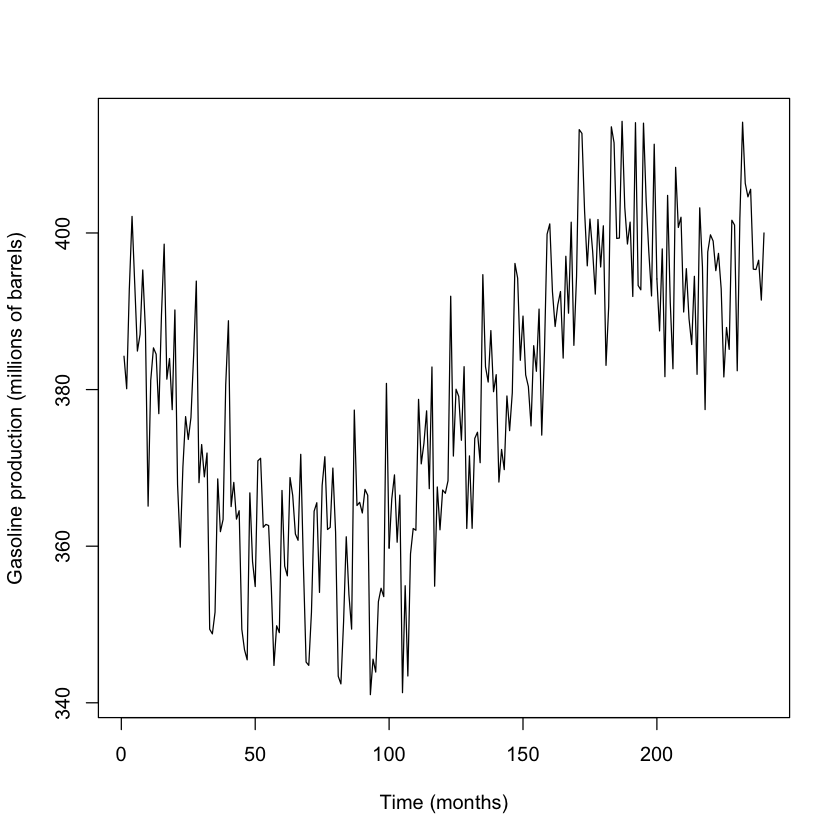

In [2]:
# create a time series object
gas_prod <- ts(gas_prod_input[,2])
#examine the time series
plot(gas_prod, xlab = "Time (months)",
     ylab = "Gasoline production (millions of barrels)")

In R, the `ts()` function creates a time series object from a vector or a matrix. The use of time series objects in R simplifies the analysis by providing several methods that are tailored specifically for handling equally time spaced data series. For example, the `plot()` function does not require an explicitly speci- fied variable for the x-axis.

To apply an ARMA model, the dataset needs to be a stationary time series. Using the `diff()` function, the gasoline production time series is differenced once and plotted.

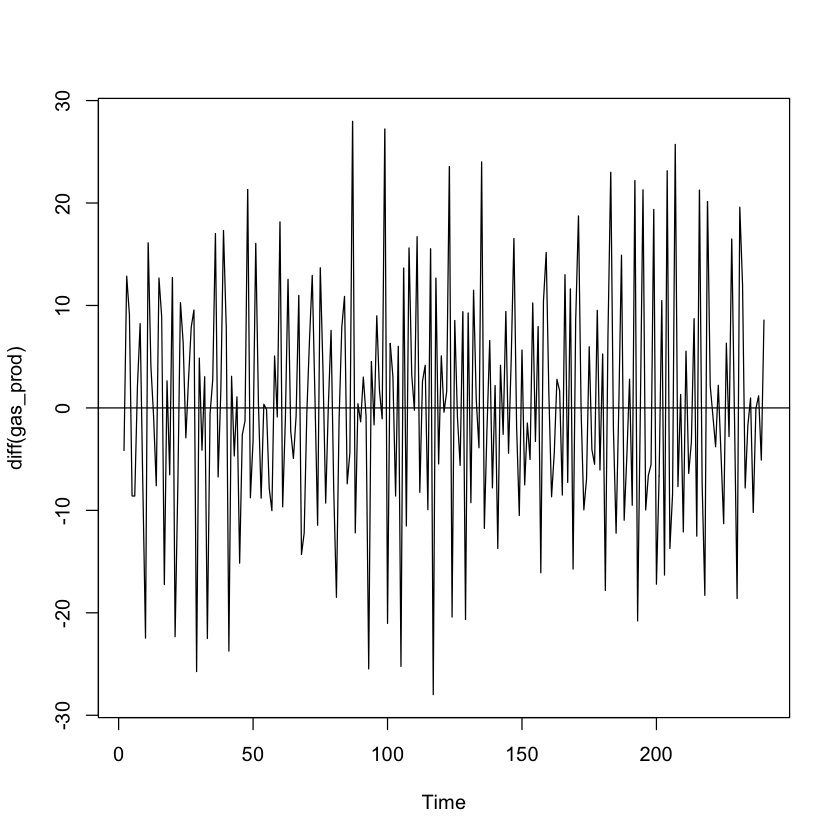

In [3]:
# check for conditions of a stationary time series
plot(diff(gas_prod))
abline(a=0, b=0)

The differenced time series has a constant mean around 0 with fairly constant variance over time. This is a stationary time series. We can now apply the AR models.

We can visualise the ACF using the `acf()` function:

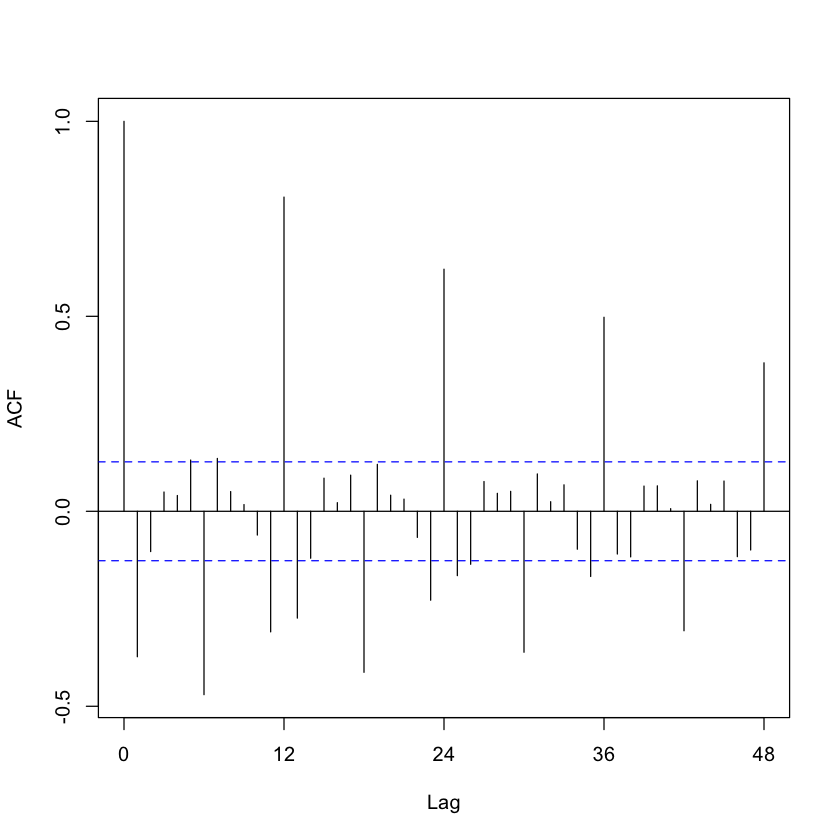

In [4]:
acf(diff(gas_prod), xaxp = c(0, 48, 4), lag.max=48, main="")

Similarly we can view the PACF function using `pacf()`:

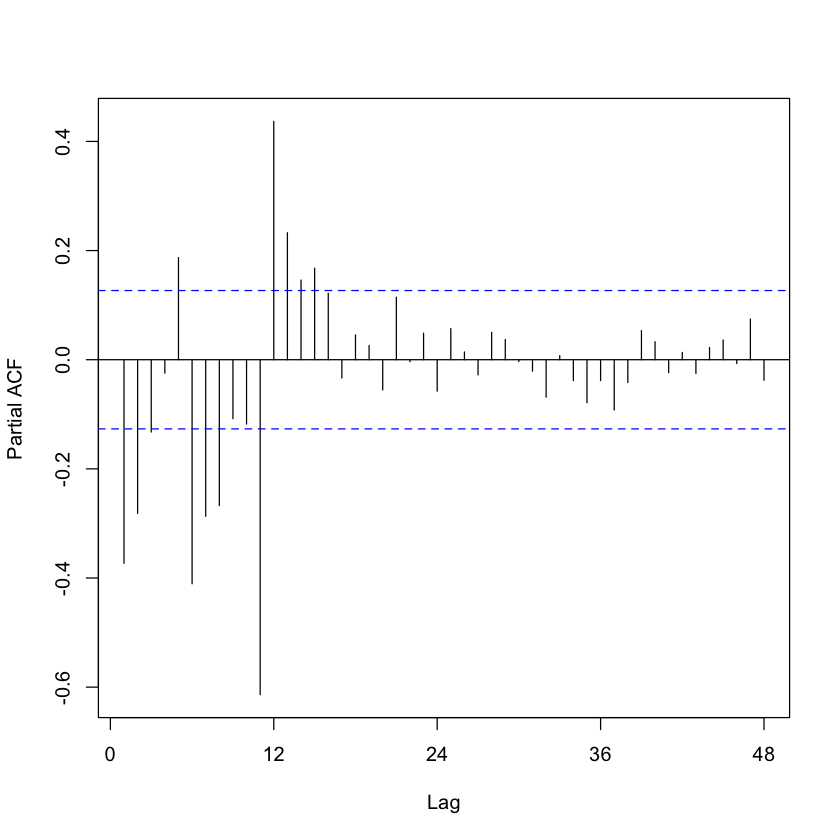

In [5]:
pacf(diff(gas_prod), xaxp = c(0, 48, 4), lag.max=48, main="")

From the ACF plot we see peaks at lags corresponding to multiples of 12, indicating a seasonal pattern with a 12 month period.

We can use the `arima()` function in R to fit a $(0,1,0) × (1,0,0)_{12}$ model. We address the seasonal component before addressing the rest. The analysis is applied to the original time series variable. The differencing, d = 1, is specified by the order = c(0,1,0) term.

In [6]:
# fit a (0,1,0)x(1,0,0)12 ARIMA model
arima_1 <- arima (gas_prod,
                  order=c(0,1,0), # this specifies the differencing d = 1
                  seasonal = list(order=c(1,0,0),period=12))
arima_1


Call:
arima(x = gas_prod, order = c(0, 1, 0), seasonal = list(order = c(1, 0, 0), 
    period = 12))

Coefficients:
        sar1
      0.8335
s.e.  0.0324

sigma^2 estimated as 37.29:  log likelihood = -778.69,  aic = 1561.38

The coefficient value is several times larger than the standard error, so we consider the coefficient to be significant.

Let us examine the residuals from the arima_1 model

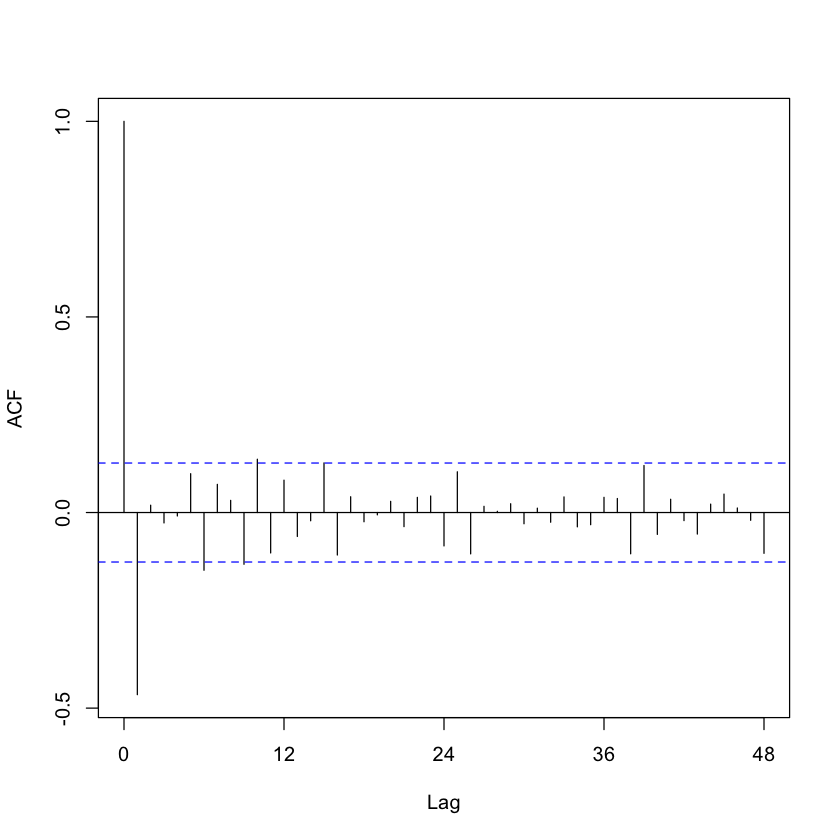

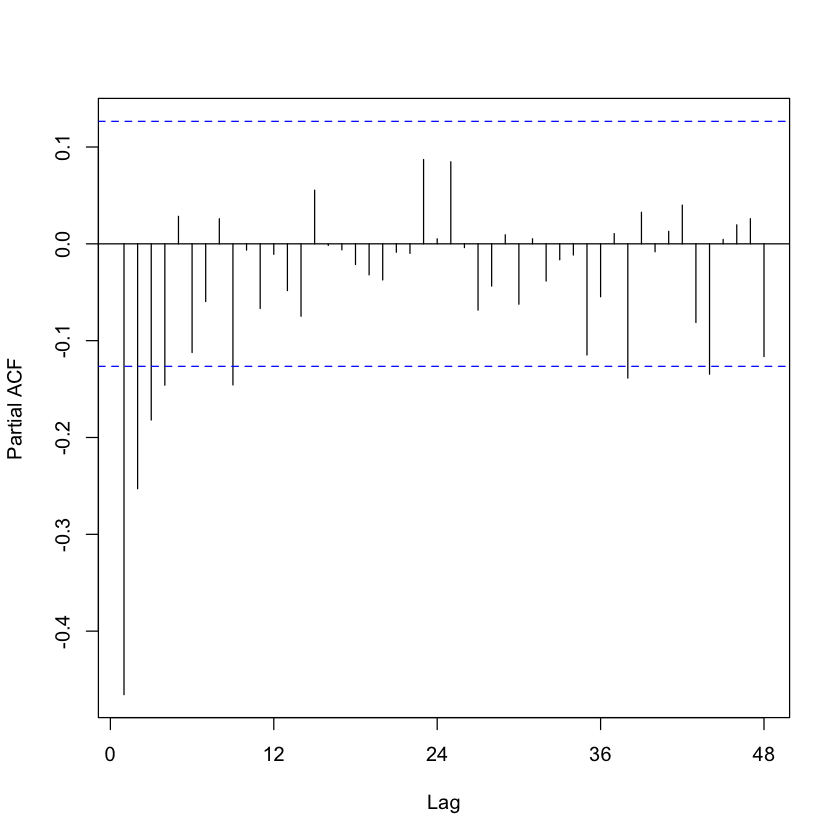

In [7]:
# examine ACF and PACF of the (0,1,0)x(1,0,0)12 residuals
acf(arima_1$residuals, xaxp = c(0, 48, 4), lag.max=48, main="")
pacf(arima_1$residuals, xaxp = c(0, 48, 4), lag.max=48, main="")

Note the lack of correlation at lags  12, 24, 36, and 48. But, there is correlation at lag 1. Also, the PACF shows slow decay starting at lag 1. This suggests a MA(1) model for the nonseasonal component. In other words, let us consider $(0,1,1)×(1,0,0)_{12}$ ARIMA model to the original time series.

In [8]:
# fit a (0,1,1)x(1,0,0)12 ARIMA model
arima_2 <- arima (gas_prod,
                  order=c(0,1,1),
                  seasonal = list(order=c(1,0,0),period=12))
arima_2


Call:
arima(x = gas_prod, order = c(0, 1, 1), seasonal = list(order = c(1, 0, 0), 
    period = 12))

Coefficients:
          ma1    sar1
      -0.7065  0.8566
s.e.   0.0526  0.0298

sigma^2 estimated as 25.24:  log likelihood = -733.22,  aic = 1472.43

Based on the standard errors associated with each coefficient estimate, the coefficients are significantly different from zero.

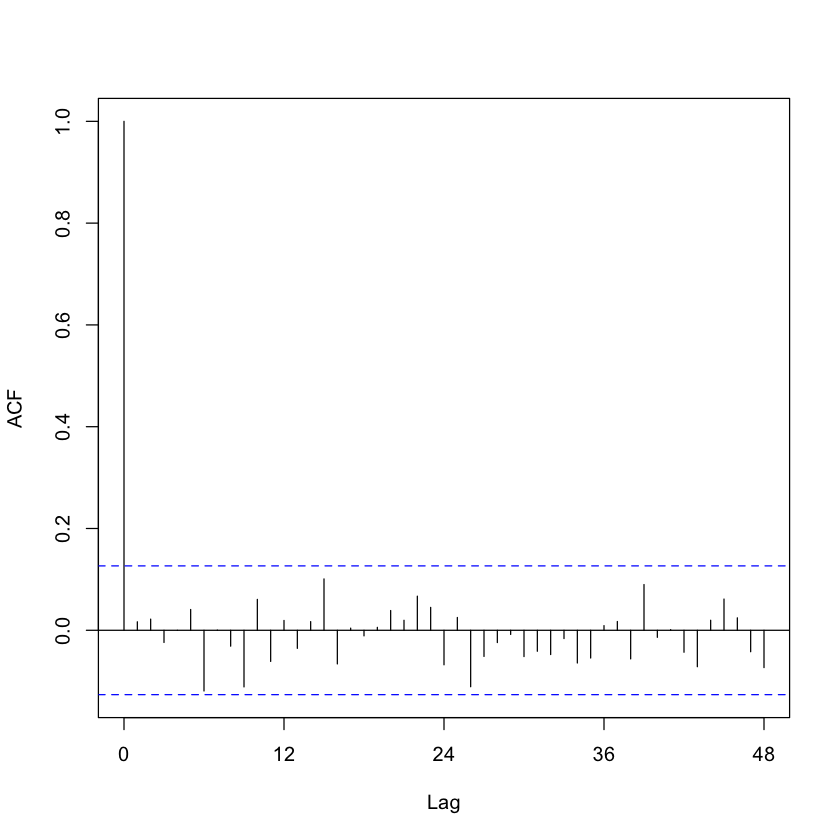

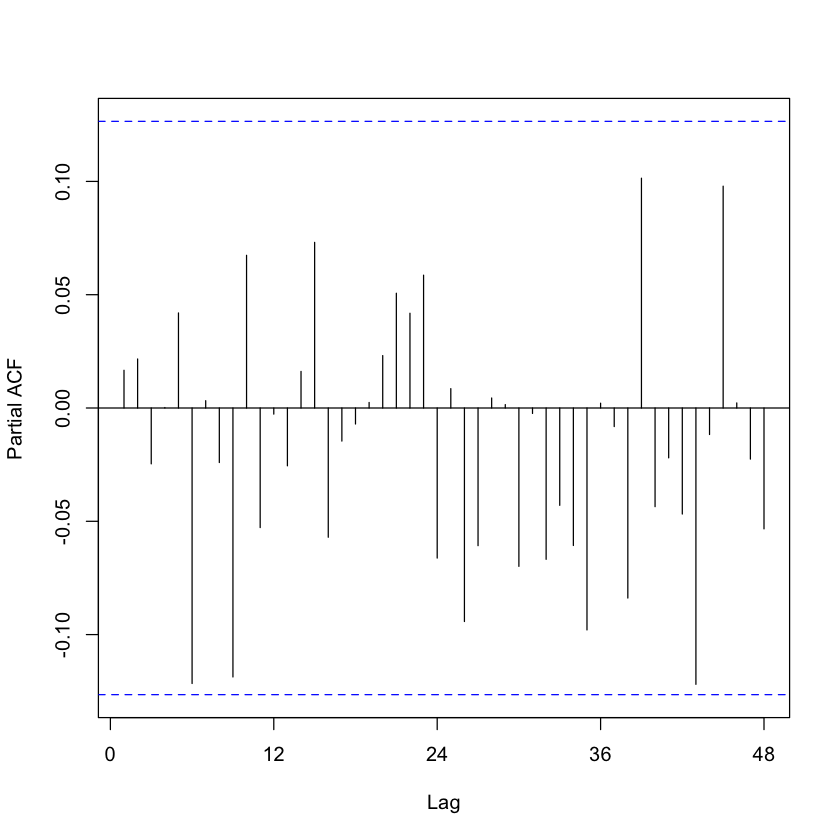

In [9]:
# examine ACF and PACF of the (0,1,1)x(1,0,0)12 residuals
acf(arima_2$residuals, xaxp = c(0, 48, 4), lag.max=48, main="")
pacf(arima_2$residuals, xaxp = c(0, 48,4), lag.max=48, main="")

The respective ACF and PACF plots for the residuals from the second pass ARIMA model indicate that no further terms need to be considered in the ARIMA model.

### 8.3.1 Evaluating the Model

The `arima()` function in R uses Maximum Likelihood Estimation (MLE) to estimate the model coefficients. In the R output for an ARIMA model, the log-likelihood (logL) value is provided. The values of the model coefficients are determined such that the value of the log likelihood function is maximized. Based on the log L value, the R output provides several measures that are useful for comparing the appropriateness of one fitted model against another fitted model. These measures follow:

- AIC (Akaike Information Criterion)
- AICc (Akaike Information Criterion, corrected)
- BIC (Bayesian Information Criterion)

Because these criteria impose a penalty based on the number of parameters included in the models, the preferred model is the fitted model with the smallest AIC, AICc, or BIC value.

The criteria can be evaluated as follows:

In [10]:
npar <- length(arima_2$coef) + 1
nstar <- length(arima_2$residuals) - arima_2$arma[6] - arima_2$arma[7] * arima_2$arma[5]

# AIC
AIC(arima_2)
# AICc    
AIC(arima_2) + 2 * npar * (nstar/(nstar - npar - 1) - 1)
# BIC
AIC(arima_2,k = log(length(gas_prod)))

[1] 1472.432

[1] 1472.534

[1] 1482.874

### 8.3.2 Normality Assumption and Constant Variance

The last model validation step is to examine the normality assumption of the residuals. Just like with regression, we can verify this using a histogram of residuals or a qq plot.

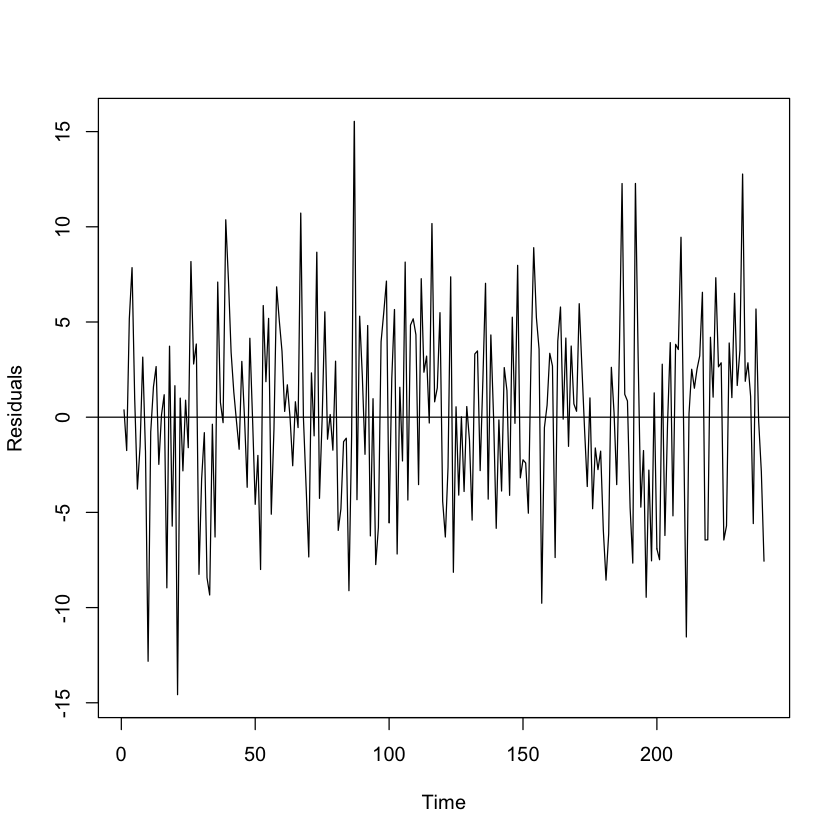

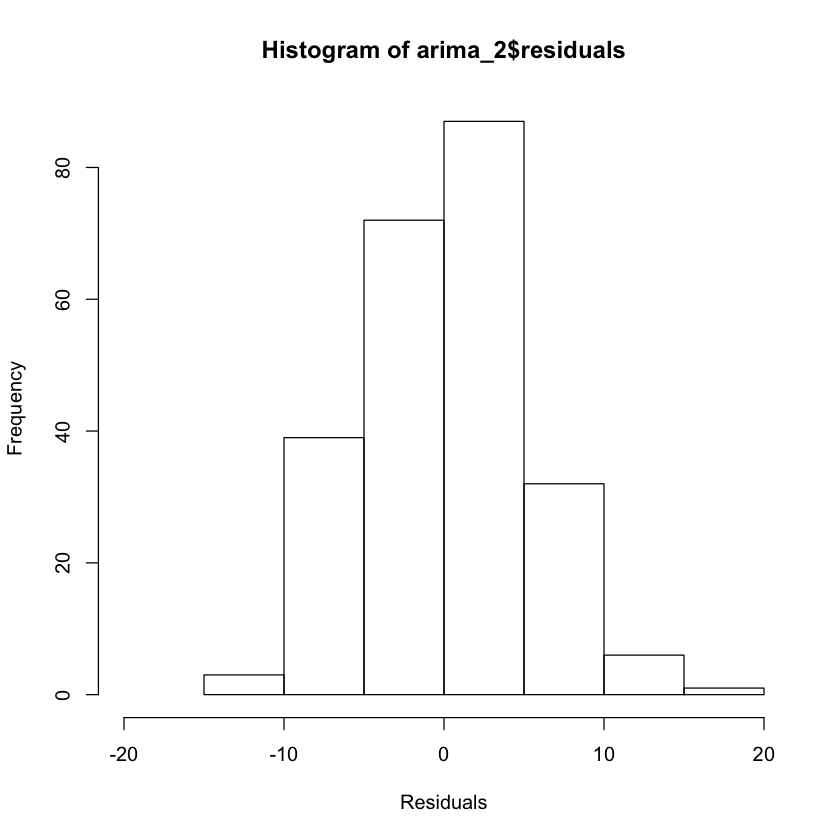

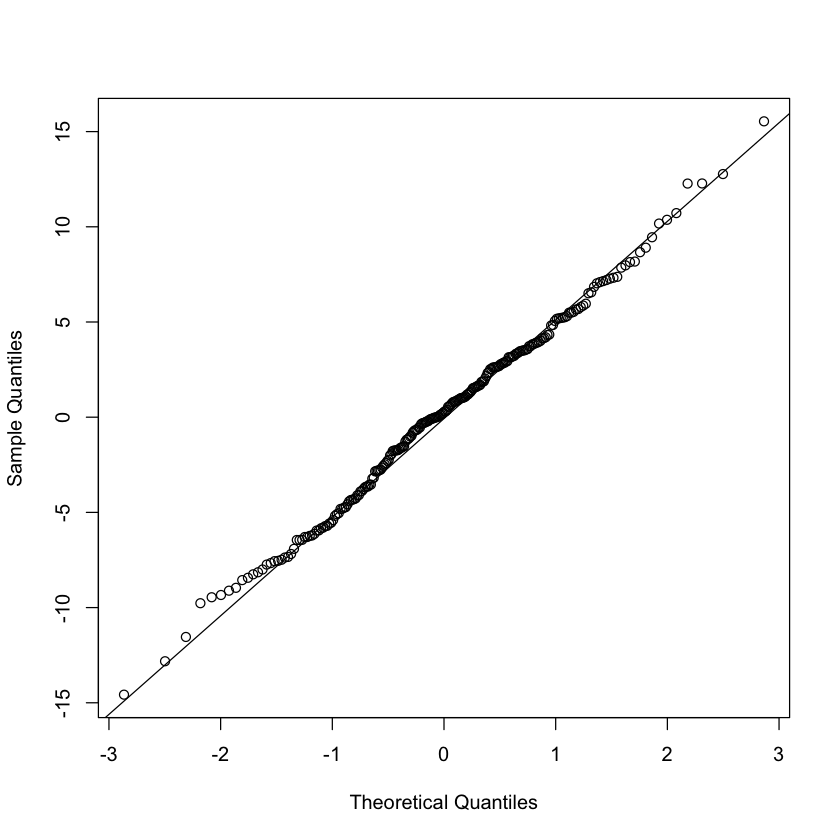

In [11]:
plot(arima_2$residuals, ylab = "Residuals")
abline(a=0, b=0)

hist(arima_2$residuals, xlab="Residuals", xlim=c(-20,20))

qqnorm(arima_2$residuals, main="")
qqline(arima_2$residuals)

If the normality or the constant variance assumptions do not appear to be true, it may be necessary to transform the time series prior to fitting the ARIMA model. A common transformation is to apply a logarithm function.

### 8.3.3 Forecasting

The next step is to use the fitted $(0,1,1) × (1,0,0)_{12}$ model to forecast the next 12 months of gasoline production. In R, the forecasts are easily obtained using the predict() function and the fitted model already stored in the variable arima_2. The predicted values along with the associated upper and lower bounds at a 95% confidence level can be displayed in R as follows:

In [12]:
#predict the next 12 months
arima_2.predict <- predict(arima_2,n.ahead=12)
matrix(c(arima_2.predict$pred-1.96*arima_2.predict$se,
        arima_2.predict$pred, arima_2.predict$pred+1.96*arima_2.predict$se),
        12,3, dimnames=list( c(241:252) ,c("LB","Pred","UB")) )

,LB,Pred,UB
241,394.9689,404.8167,414.6645
242,378.6142,388.8773,399.1404
243,394.9943,405.6566,416.3189
244,405.0188,416.0658,427.1128
245,397.9545,409.3733,420.7922
246,396.1202,407.8991,419.6780
247,396.6028,408.7311,420.8594
248,387.5241,399.9920,412.4598
249,387.1523,399.9507,412.7492
250,387.8486,400.9693,414.0900


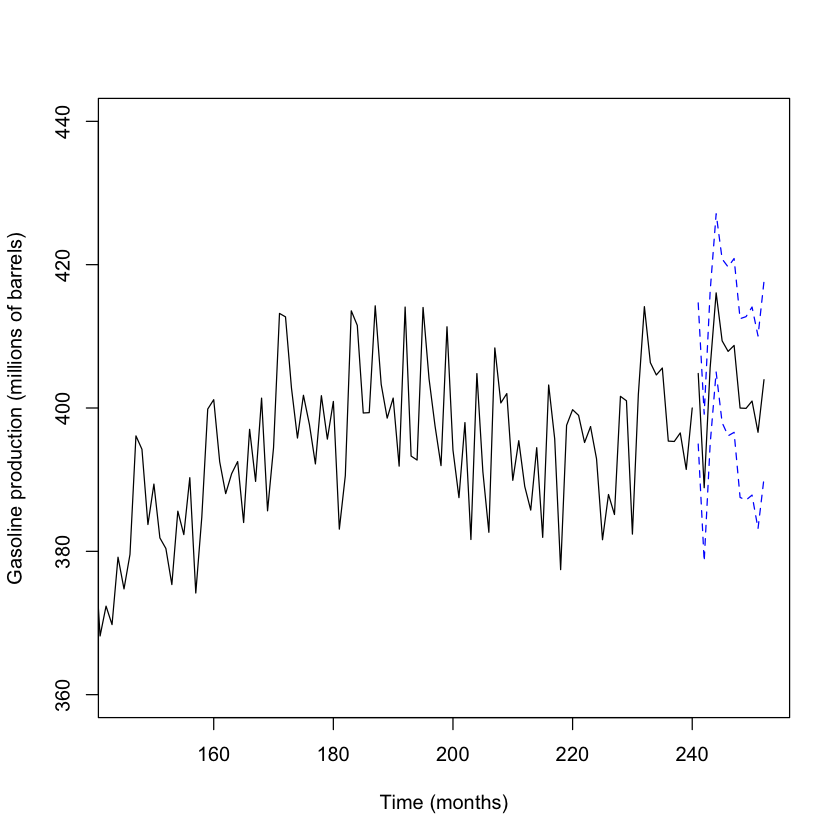

In [13]:
plot(gas_prod, xlim=c(145,252),
xlab = "Time (months)",
ylab = "Gasoline production (millions of barrels)", ylim=c(360,440))
lines(arima_2.predict$pred)
lines(arima_2.predict$pred+1.96*arima_2.predict$se, col=4, lty=2)
lines(arima_2.predict$pred-1.96*arima_2.predict$se, col=4, lty=2)